_Natural Convection_

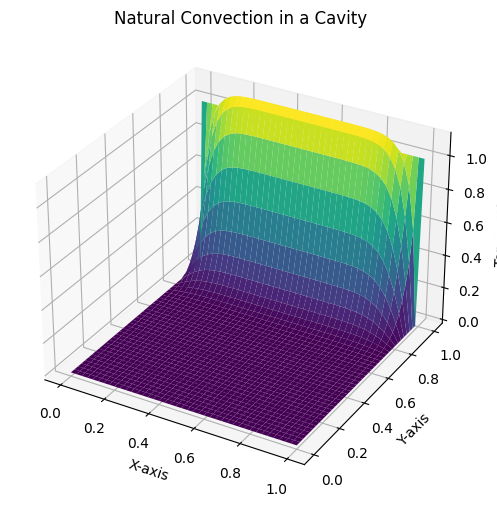

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
L = 1.0  # Dimension of the cavity (length)
W = 1.0  # Dimension of the cavity (width)
nx, ny = 41, 41  # Number of grid points in x and y directions
dx, dy = L / (nx - 1), W / (ny - 1)  # Grid spacing
alpha = 0.01  # Thermal diffusivity
beta = 0.003  # Coefficient of volume expansion
Gr = 1000  # Grashof number
Ra = Gr * beta  # Rayleigh number

# Initial conditions
T_init = 0.0  # Initial temperature
T_top = 1.0  # Temperature at the top wall
T_bottom = 0.0  # Temperature at the bottom wall
T_left = 0.0  # Temperature at the left wall
T_right = 0.0  # Temperature at the right wall

# Initialize temperature field
T = np.ones((ny, nx)) * T_init

# Boundary conditions
T[:, 0] = T_left
T[:, -1] = T_right
T[0, :] = T_bottom
T[-1, :] = T_top

# Simulation parameters
num_steps = 500
dt = 0.001  # Time step

# Finite difference method for 2D heat conduction
for step in range(num_steps):
    Tn = T.copy()

    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            laplacian_T = (Tn[j, i + 1] - 2 * Tn[j, i] + Tn[j, i - 1]) / dx**2 + \
                          (Tn[j + 1, i] - 2 * Tn[j, i] + Tn[j - 1, i]) / dy**2

            T[j, i] = Tn[j, i] + alpha * dt * laplacian_T + beta * Gr * dt * (Tn[j, i] - T_init)

# Plot the temperature field
x = np.linspace(0, L, nx)
y = np.linspace(0, W, ny)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, T, cmap='viridis')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Temperature')
ax.set_title('Natural Convection in a Cavity')
plt.show()
